# Exploratory Data Analysis (EDA) with Housing Price Dataset

Exploratory Data Analysis (EDA) is a crucial step in the data analysis pipeline. It helps us understand the data, discover patterns, spot anomalies, and frame hypotheses. In this lesson, we'll use a housing price dataset to explore various EDA techniques.

## Initial Steps for Data Analysis

The initial steps for data analysis in Python include:

1. **Data Acquisition:** This involves gathering data from various sources such as local files, databases, APIs, websites, etc.
 
2. **Loading the Data:** Common formats to consider are CSV (Comma Separated Values), JSON, XLS, HTML, XML, and more.

3. **Exploratory Data Analysis (EDA):** EDA is a systematic approach to initial data inspection. It leverages **descriptive analysis** techniques to understand the data better, identify outliers, highlight significant variables, and generally uncover underlying data patterns. Additionally, EDA helps in organizing the data, spotting errors, and assessing missing values.

4. **Data Cleaning:** It's crucial to check the available data and perform tasks such as removing empty columns, standardizing terms, imputing missing data where appropriate, and more.

5. After cleaning, you should conduct a more in-depth exploratory data analysis to further understand the data.

## Methods in EDA

EDA methodologies can be broadly categorized into:

- **Numerical Measures:** These can include coefficients, frequency counts, and other statistical metrics.
  
- **Visual Representations:** Examples are histograms, scatter plots, pie charts, and more.

Additionally, based on the number of variables in focus, methods can be:

- **Univariate:** Describing the characteristics of a single variable at a time.
  
- **Bivariate:** Analyzing the relationship between two variables, either in tandem or understanding one variable based on the other (examining the influence of one independent variable in relation to the dependent variable).
  
- **Multivariate:** An extension of bivariate analysis but for multiple variables. It explores the relationships among them or the impact of two or more independent variables (sometimes along with associated variables or covariates) on one or more dependent variables.

**Note**
It's crucial to ensure that all our analytical methods are tailored to the type of variable under consideration.


## Loading the Dataset

Before we dive into EDA, let's gather our data. In this case, we will load our dataset and take a quick look at its structure.


The dataset can be found [here](https://raw.githubusercontent.com/data-bootcamp-v4/data/main/housing_price_eda.csv) and the information about the dataset [here](https://github.com/data-bootcamp-v4/data/blob/main/housing_price_dataset_info.md).

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/housing_price_eda.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Initial Exploration

Before diving into the specifics of univariate analysis, it's essential to get acquainted with our dataset.


In [5]:
df.shape

(1460, 81)

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Exploring numerical and categorical variables

We'll explore numerical and categorical variables, and create two dataframes, one for each type of variable.

**Note**: 
- **Numerical variables**: These can encompass both quantitative and qualitative information. Often, discrete numerical variables with limited distinct values hint at qualitative (categorical) variable encoded as numbers.

- **Object variables**: Typically, these consist of qualitative data, numeric data in a String format, or data that might not be directly relevant to the analysis. Examples include identifiers like 'ID' numbers or 'Names'. Variables with a broad range of unique values, especially in string format, often fall into this category. 


In [8]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Decide based on domain knowledge and the above explorations which numerical columns are better as categorical
 and vice versa. 
 
 For demonstration purposes, let's assume the *potential_categorical_from_numerical* are categorical, even though this might not be the case in a real scenario.

In [9]:
df.describe(exclude='number').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


As previously mentioned during the data cleaning phase, it's essential to also explore **Data Typing/Formatting** to ensure data is in the correct type or format, **Duplicates** to check and handle any repeated data points, **Missing Values** to identify and address any null or missing data, **Categorical Variables** to examine the unique categories and their distributions and check whether they need cleaning (example: for gender, values such as M, F, Masculine, masculine, Femenine etc.), same for numerical data, **Outliers** to identify and decide how to handle extreme values etc.
By exploring this, we can proceed with proper data cleaning. 

We won't be delving into this now, as we already saw it in data cleaning lessons (expect for outliers, which we'll be reviewing later in this lesson). We'll just clean quickly null values, so we can focus in univariate analysis.

## Data Cleaning


### Checking for Missing Data

Missing data can influence our analysis. It's essential to identify and handle them appropriately.


In [18]:
nan_cols = df.isna().sum() / len(df) * 100

In [19]:
nan_cols[nan_cols>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [15]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [21]:
nan_cols[nan_cols>80].index

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [22]:
df.drop(columns=nan_cols[nan_cols>80].index, inplace=True)

In [23]:
nan_cols = df.isna().sum() / len(df) * 100

nan_cols[nan_cols>0]

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [24]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [25]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [28]:
df.drop(columns=['FireplaceQu'], inplace=True)

In [29]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [31]:
nan_cols = df.isna().sum() #/ len(df) * 100

nan_cols[nan_cols>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [32]:
df.dropna(inplace=True)

nan_cols = df.isna().sum() 

nan_cols[nan_cols>0]

Series([], dtype: int64)

## Univariate Analysis

Univariate analysis, as its name suggests, concentrates on one variable at a time, giving us a deep understanding of its characteristics. This fundamental step in Exploratory Data Analysis (EDA) lays the groundwork for subsequent analyses involving multiple variables. Let's explore various techniques for both categorical and numerical variables.

**Categorical variables**:
- Frequency tables. Counts and proportions.
- Visualizations: Bar charts, pie charts

**Numerical variables**: 
- Measures of centrality: Mean, median, mode
- Measures of dispersion: Variance,  standard deviation, minimum, maximum, range, quantiles
- Shape of the distribution: Symmetry and kurtosis
- Visualizations: Histograms, box plots

### Categorical Variables

Categorical variables represent categories or labels, like types or groups. Analyzing categorical data involves understanding the frequency or proportion of each category.

#### Frequency Tables

Frequency tables are tabular representations that display the number of occurrences of each category. They help in understanding the distribution of categories in a dataset.

In python, we can use:
- `value_counts()`
- `pd.crosstab()`

Let's consider *MSZoning* as our categorical variable of interest, which represents the general zoning classification of the sale.

We'll look at `value_counts()`.

In [34]:
df['MSZoning'].value_counts()

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

In [36]:
df['MSZoning'].value_counts(normalize=True) * 100

RL         79.671151
RM         14.275037
FV          4.633782
RH          0.822123
C (all)     0.597907
Name: MSZoning, dtype: float64

The frequency table gives the count of each zoning type, while the proportion table provides the percentage representation of each category in the dataset. This helps to quickly identify dominant and minority categories.

Let's look at `pd.crosstab()`. The crosstab function can be useful to compute a cross-tabulation of two (or more) factors. Here, it's used to count the occurrences of each 'MSZoning' type.

In [37]:
pd.crosstab(index=df['MSZoning'], columns='count') # frecuencias absolutas

col_0,count
MSZoning,
C (all),8
FV,62
RH,11
RL,1066
RM,191


The crosstab table displays the number of occurrences of each 'MSZoning' type, just like the frequency table. Computing the proportion table showcases the relative percentage of each category.

#### Visualizations

Visualizations offer a more intuitive understanding of categorical data distribution. Bar charts and pie charts are common methods to visually represent categorical data.

##### Bar charts

Bar charts can display the frequency or proportion of each category using bars of varying lengths. Here, the same data is visualized using three different methods: `sns.barplot()` and `sns.countplot()`.

Let's see how to use the `sns.barplot()` function with the result from `value_counts()` and `pd.crosstab()`. We should expect the same plot for both following lines of code.

In [40]:
frecuencia = df['MSZoning'].value_counts()

frecuencia

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

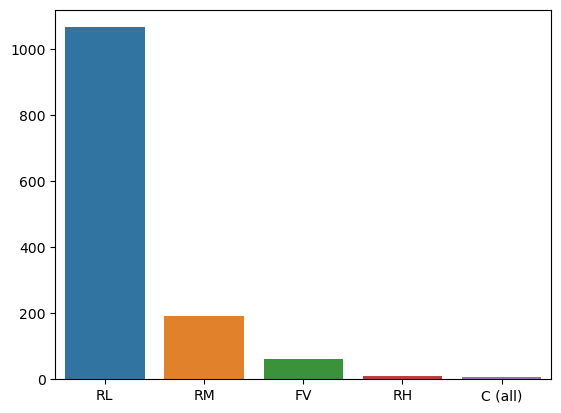

In [42]:
sns.barplot(x=frecuencia.index, y=frecuencia.values);

Using matplotlib, would just be:

```python
my_table.plot.bar()
```

##### Countplots

A countplot is a type of bar plot in Seaborn that displays the count of occurrences of unique values in a categorical column.

Same result now as the *bar plot* since it just assumes Y axis is the count of frequencies. 

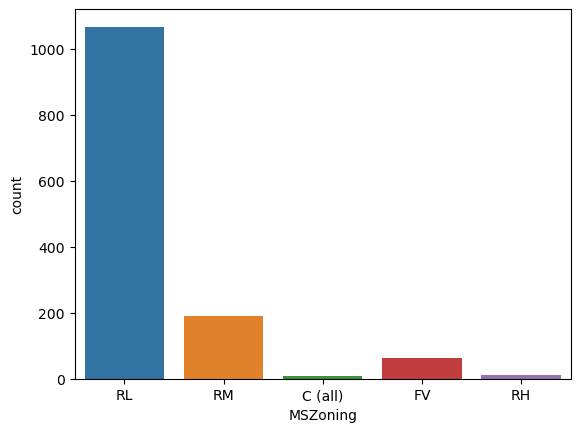

In [44]:
sns.countplot(data=df, x='MSZoning');

##### Pie charts



Pie charts provide a circular representation of the data, showing the proportion of each category as slices of a pie. However, they can be challenging to interpret when there are many categories or when categories have similar proportions.

Seaborn, as of 2023, does not have a dedicated function for pie charts. Pie charts are more commonly created using `matplotlib`, which Seaborn is built upon.

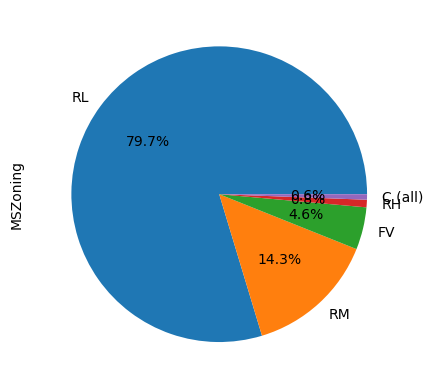

In [47]:
frecuencia.plot.pie(autopct='%1.1f%%');

### Numerical Variables

Numerical variables are quantitative, and their values can be measured. Analyzing numerical data involves understanding its distribution, central tendency, and variability.


#### Summary Statistics

**Centrality and Dispersion Measures**

Let's start by getting some basic statistics on our dataset to understand its scale, centrality, and spread.


- The `.describe()` method provides key statistics for numerical columns (by default) in a dataframe, excluding NaN values; although it primarily targets numeric data, the `include` parameter allows for the selection of other data types.

In [49]:
df.describe().T.tail()

,count,mean,std,min,25%,50%,75%,max
PoolArea,1338.0,3.010463,41.961337,0.0,0.0,0.0,0.0,738.0
MiscVal,1338.0,42.932735,508.056255,0.0,0.0,0.0,0.0,15500.0
MoSold,1338.0,6.331839,2.699437,1.0,5.0,6.0,8.0,12.0
YrSold,1338.0,2007.805680,1.330691,2006.0,2007.0,2008.0,2009.0,2010.0
SalePrice,1338.0,186761.782511,78913.847668,35311.0,135000.0,168500.0,220000.0,755000.0


#### More Centrality and Dispersion Measures

Now, suppose we want to calculate individual statistical measures without using the `.describe()` method. Here are some ways to do it:

- `df[column].mean()`: Computes the mean of the selected column.
- `df[column].median()`: Calculates the median of the selected column.
- `df[column].mode()`: Identifies the mode of the selected column.
- `df[column].std()`: Determines the standard deviation of the selected column.
- `df[column].var()`: Computes the variance of the selected column.
- `df[column].min()`: Finds the minimum value in the selected column.
- `df[column].max()`: Finds the maximum value in the selected column.
- `df[column].count()`: Counts the number of non-NaN entries in the selected column.

In these examples, replace `column` with the name of the column you want to analyze.

For this section, we'll focus on 'SalePrice' as our numerical variable of interest, which represents the price at which the house was sold.

In [50]:
mean_price = df['SalePrice'].mean()
median_price = df['SalePrice'].median()
mode_price = df['SalePrice'].mode()[0]

mean_price, median_price, mode_price

(186761.78251121077, 168500.0, 140000)

#### Shape of the Distribution

Skewness and kurtosis provide insights into the shape of the data distribution. Skewness indicates the asymmetry, and kurtosis tells about the "tailedness" or how peaked the distribution is.

In [51]:
variance_price = df['SalePrice'].var()
std_dev_price = df['SalePrice'].std()
min_price = df['SalePrice'].min()
max_price = df['SalePrice'].max()
range_price = max_price - min_price
quantiles_price = df['SalePrice'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(6227395353.715565,
 78913.84766766582,
 35311,
 755000,
 719689,
 0.25    135000.0
 0.50    168500.0
 0.75    220000.0
 Name: SalePrice, dtype: float64)

#### Visualizations

Visual tools like histograms and box plots offer insights into the distribution, variability, and potential outliers in numerical data.

##### Histograms

Histograms display the frequency distribution of a dataset. The height of each bar represents the number of data points in each bin.

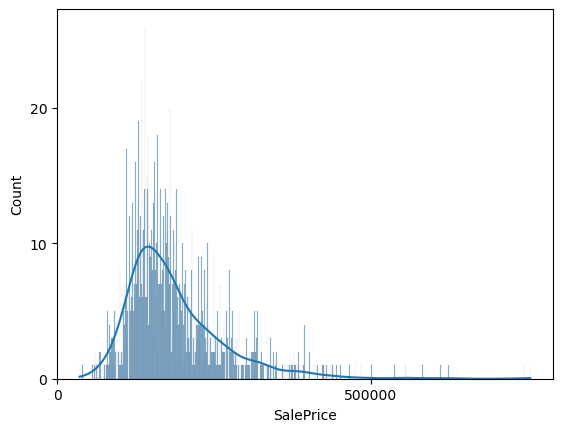

In [60]:
sns.histplot(df.SalePrice, kde=True, binwidth=1000)

plt.xticks([0, 500000])
plt.yticks([i for i in range(0, 25, 10)]);

##### Box plots

Box plots, or whisker plots, showcase the central 50% of the data (interquartile range), potential outliers, and other statistical properties.

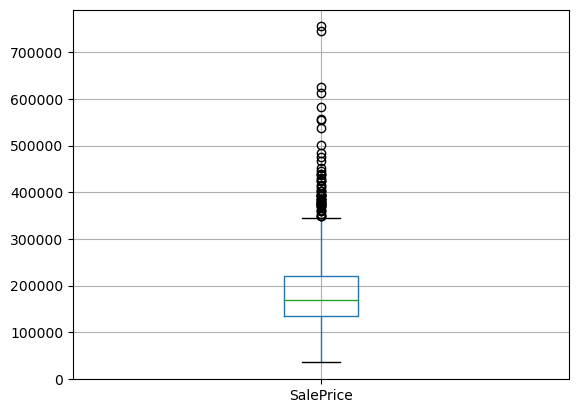

In [65]:
df[['SalePrice']].boxplot();

## Converting continuous to discrete variables: Discretization

Discretization is the process of converting continuous variables into discrete ones by creating a set of contiguous intervals (or bins) and then categorizing the variables into these intervals. This can be particularly useful when you want to categorize a continuous variable into different groups based on ranges. Note that we usually lose information in this process.

For our dataset, let's take the 'SalePrice' column, which is continuous, and discretize it into categories like 'Low', 'Medium', 'High', and 'Very High'.

In [66]:
bins = [0, 100000, 200000, 300000, df['SalePrice'].max()]

labels = ['Low', 'Medium', 'High', 'Very High']

In [68]:
df['SalePrice_category'] = pd.cut(df['SalePrice'], bins=bins, labels=labels)

In [70]:
df['SalePrice_category'].value_counts()

Medium       849
High         306
Very High    114
Low           69
Name: SalePrice_category, dtype: int64

Another useful option is **discretizing by quantiles**. This means dividing the data into intervals based on specific quantile values. This ensures that each bin has (approximately) the same number of data points. The `pandas` library provides a convenient method, `qcut()`, for this purpose.

Discretizing by quantiles can be particularly useful when you want to create categories that represent relative rankings (like low, medium, high, etc.) based on the distribution of the data, rather than fixed numeric ranges.

**Step 1**: Choose the number of quantiles (or bins). For example, if you want quartiles, you would choose 4 bins. 

**Step 2**: Use the `qcut()` function from `pandas`.

In [80]:
pd.qcut(df['SalePrice'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4']).head()

0    Q3
1    Q3
2    Q4
3    Q2
4    Q4
Name: SalePrice, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [77]:
pd.qcut(df['SalePrice'], q=4).head()

0    (168500.0, 220000.0]
1    (168500.0, 220000.0]
2    (220000.0, 755000.0]
3    (135000.0, 168500.0]
4    (220000.0, 755000.0]
Name: SalePrice, dtype: category
Categories (4, interval[float64, right]): [(35310.999, 135000.0] < (135000.0, 168500.0] < (168500.0, 220000.0] < (220000.0, 755000.0]]

In [74]:
df['SalePrice'].describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Summary

In this lesson, we've conducted a comprehensive univariate analysis:

- For **categorical variables**, we visualized the distribution of our zoning classifications with bar and pie charts, backed by frequency tables.
- For **numerical variables**, we explored the central tendencies, dispersions and shape of distribution of our sale prices, visualized through histograms and box plots.

This analysis allows us to deeply understand each variable, laying a strong foundation for subsequent multivariate analyses.